## Creating a Balanced Subset (10,400 Samples) from the A–Z Handwritten Alphabets Dataset

In [ ]:
import pandas as pd

In [ ]:

# Load the dataset
df = pd.read_csv("A_Z Handwritten Data.csv")

In [ ]:
# Check dataset info
print("Total samples:", len(df))
print("Number of unique labels:", df['0'].nunique())

Total samples: 372450
Number of unique labels: 26


In [ ]:
# Choose how many samples per letter
# 400 per letter = 26 × 400 = 10,400 samples
samples_per_letter = 400

In [ ]:
# Balanced sampling
balanced_df = (
    df.groupby('0')
      .apply(lambda x: x.sample(n=samples_per_letter, random_state=42))
      .reset_index(drop=True)
)

/tmp/ipython-input-1018162971.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=samples_per_letter, random_state=42))


In [ ]:
# Save the balanced dataset
balanced_df.to_csv("A_Z_handwritten_balanced.csv", index=False)

print("Balanced dataset saved as A_Z_handwritten_balanced (1).csv")
print("Balanced dataset size:", len(balanced_df))

Balanced dataset saved as A_Z_handwritten_balanced.csv
Balanced dataset size: 10400


We created a balanced subset from the A–Z Handwritten Alphabets dataset by selecting an equal number of samples for each letter. Since the original dataset contained over 370,000 samples with 26 unique labels, we decided to extract 400 samples per letter to ensure uniform representation across all classes. This process resulted in a balanced dataset of 10,400 samples in total (26 × 400). By applying stratified random sampling with a fixed random state, we maintained fairness and reproducibility in the subset, which helps reduce bias during training and ensures that each alphabet character contributes equally to the model learning process.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


## Set seeds for reproducibility

In [ ]:
import numpy as np, random, tensorflow as tf

SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)


## Load dataset and inspect shape

In [ ]:


csv_path = "/content/A_Z_handwritten_balanced (1).csv"
df = pd.read_csv(csv_path)


df.head()


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This code loads the balanced A–Z handwritten dataset from a CSV file and displays the first few rows. It helps verify that the dataset has been read correctly and that the structure matches expectations

## Check shape

In [ ]:
# Check shape
print("Shape:", df.shape)

# The first column is the label (0–25), the rest are 784 pixels
X = df.drop('0', axis=1).values   # image pixels
y = df['0'].values                # labels

Shape: (10400, 785)


This step prints the dataset’s shape to confirm the number of rows (samples) and columns (features). It also separates the features (image pixels) from the labels (class IDs 0–25)

## Dataset Information

In [ ]:
# Check data types and missing values
df.info()

# Check if any missing values
print("Missing values:\n", df.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10400 entries, 0 to 10399
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 62.3 MB
Missing values:
 0


Here, the code checks the dataset’s data types and ensures there are no missing values. This is an important quality check before training

## Separate Features and Labels

In [ ]:
# First column is the label (0-25 for A-Z)
y = df.iloc[:, 0].astype(int).values
X = df.iloc[:, 1:].values

print("Feature shape:", X.shape)
print("Label shape:", y.shape)


Feature shape: (10400, 784)
Label shape: (10400,)


This line explicitly assigns the first column as the labels and the rest as pixel values. The conversion to integers ensures the labels are in the correct format

## Check label distribution

/tmp/ipython-input-2120317581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


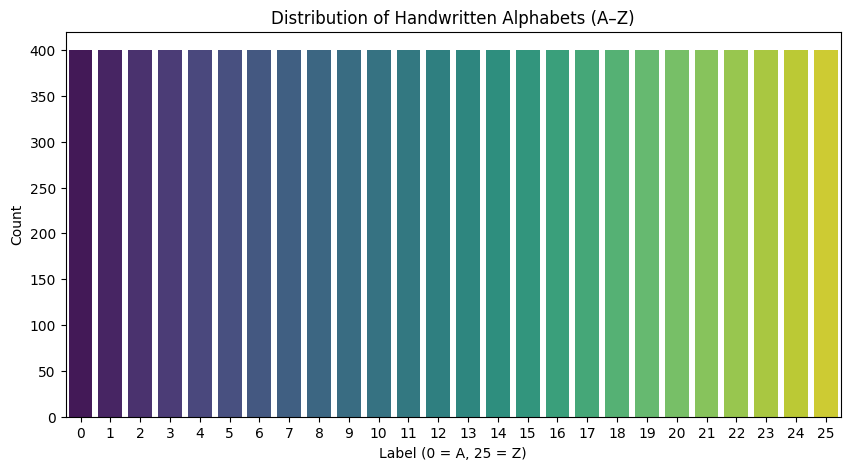

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Handwritten Alphabets (A–Z)")
plt.xlabel("Label (0 = A, 25 = Z)")
plt.ylabel("Count")
plt.show()

# map 0–25 -> 'A'–'Z' for reference
id2char = {i: chr(ord('A')+i) for i in range(26)}
print({k:id2char[k] for k in range(26)})

The code plots a histogram showing the distribution of samples across all 26 classes. This helps confirm the dataset is balanced after sampling

## Preview some images

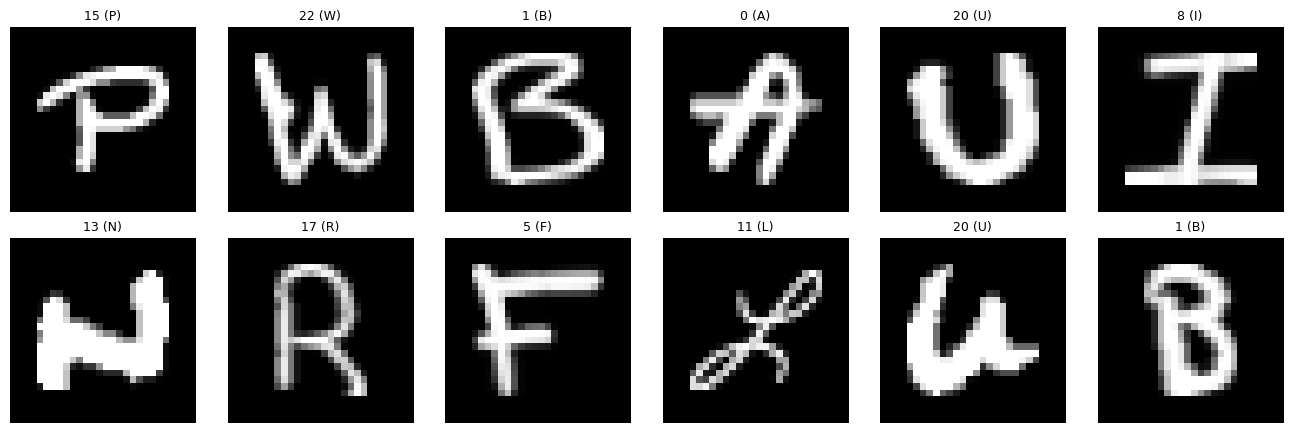

In [ ]:
def show_samples(X_flat, y, n=12):
    idx = np.random.choice(len(X_flat), n, replace=False)
    imgs = X_flat[idx].reshape(-1, 28, 28)
    labs = y[idx]

    cols = 6
    rows = int(np.ceil(n/cols))
    plt.figure(figsize=(2.2*cols, 2.2*rows))
    for i, (img, lab) in enumerate(zip(imgs, labs), 1):
        plt.subplot(rows, cols, i)
        plt.imshow(img, cmap="gray")
        plt.title(f"{lab} ({id2char[lab]})", fontsize=9)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_samples(X, y, n=12)

This function randomly selects and displays handwritten characters with their labels. It provides a quick visual check that the data is correctly structured

## Basic pixel intensity statistics

Pixel Min: 0 Pixel Max: 255 Mean: 36.585517808084774


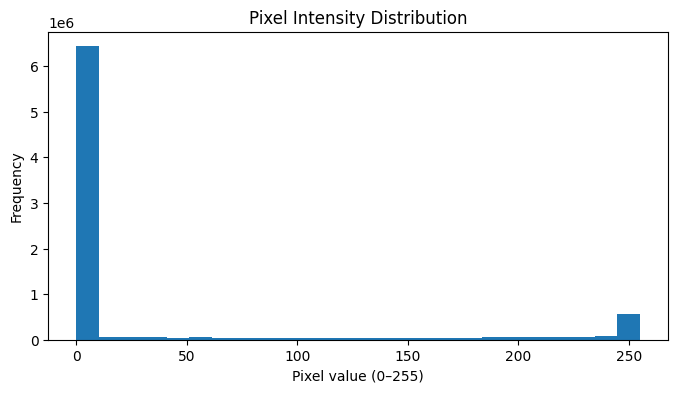

In [ ]:

pixels = X
print("Pixel Min:", pixels.min(), "Pixel Max:", pixels.max(), "Mean:", pixels.mean())

plt.figure(figsize=(8,4))
plt.hist(pixels.ravel(), bins=25)   # no custom colors; keep defaults
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel value (0–255)")
plt.ylabel("Frequency")
plt.show()


This prints the min, max, and mean pixel values, followed by a histogram of pixel intensity distribution. It helps confirm the grayscale pixel range (0–255)

## Normalize

In [ ]:

X = X.astype("float32") / 255.0
print("After normalization — min/max:", float(X.min()), float(X.max()))

After normalization — min/max: 0.0 1.0


This scales all pixel values from [0–255] to [0–1], which speeds up training and stabilizes learning in neural networks

## Train/Validation/Test split (stratified)

In [ ]:
from sklearn.model_selection import train_test_split

RNG_SEED = 42

# 80% train, 20% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=RNG_SEED
)

# 10% val, 10% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=RNG_SEED
)

print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape,   y_val.shape)
print("Test: ", X_test.shape,  y_test.shape)


Train: (8320, 784) (8320,)
Val:   (1040, 784) (1040,)
Test:  (1040, 784) (1040,)


The dataset is split into 80% training, 10% validation, and 10% test sets using stratified sampling. This ensures each class is equally represented in all subsets

## One-Hot Encode Labels

In [ ]:
from tensorflow.keras.utils import to_categorical

num_classes = len(set(y))
y_train_oh = to_categorical(y_train, num_classes)
y_val_oh   = to_categorical(y_val,   num_classes)
y_test_oh  = to_categorical(y_test,  num_classes)

print("One-hot label shapes:")
print("Train:", y_train_oh.shape)
print("Val:  ", y_val_oh.shape)
print("Test: ", y_test_oh.shape)


One-hot label shapes:
Train: (8320, 26)
Val:   (1040, 26)
Test:  (1040, 26)


This converts integer labels into one-hot encoded vectors, making them suitable for categorical classification tasks in deep learning models

## Reshape for CNN

In [ ]:
# CNN expects (28, 28, 1) shape
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_val_cnn   = X_val.reshape(-1, 28, 28, 1)
X_test_cnn  = X_test.reshape(-1, 28, 28, 1)

print("CNN input shapes:")
print("Train:", X_train_cnn.shape)
print("Val:  ", X_val_cnn.shape)
print("Test: ", X_test_cnn.shape)


CNN input shapes:
Train: (8320, 28, 28, 1)
Val:   (1040, 28, 28, 1)
Test:  (1040, 28, 28, 1)


The input images are reshaped into 28×28×1 format, which matches the expected input shape for convolutional neural networks

## Data Augmentation

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Safe augmentations for alphabets
train_aug = ImageDataGenerator(
    rotation_range=20,            # ≤ ±20°
    width_shift_range=0.10,       # ≤ 10%
    height_shift_range=0.10,      # ≤ 10%
    zoom_range=0.10,              # ≤ 10%
    fill_mode="nearest"
)
plain_gen = ImageDataGenerator()

BATCH_SIZE = 64
train_gen = train_aug.flow(X_train_cnn, y_train_oh, batch_size=BATCH_SIZE, shuffle=True, seed=SEED)
val_gen   = plain_gen.flow(X_val_cnn,   y_val_oh,   batch_size=BATCH_SIZE, shuffle=False)
test_gen  = plain_gen.flow(X_test_cnn,  y_test_oh,  batch_size=BATCH_SIZE, shuffle=False)

Data augmentation creates slightly modified versions of training images by applying rotations, shifts, and zoom. This improves generalization by preventing overfitting

## 1. Basic 3-layer CNN



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# ============================
# MODEL DEFINITION (Basic CNN)
# ============================
model = Sequential()

# Layer 1: Conv + MaxPooling
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 2: Conv + MaxPooling
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 3: Conv (No Pooling here — optional)
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))     # Optional fully connected layer
model.add(Dense(26, activation='softmax'))   # Output: 26 classes (A–Z)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model

In [ ]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,610 (951.60 KB)

 Trainable params: 243,610 (951.60 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [ ]:

history = model.fit(X_train_cnn, y_train_oh,
                    validation_data=(X_val_cnn, y_val_oh),
                    epochs=20,
                    batch_size=64,
                    verbose=1)

Epoch 1/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.4280 - loss: 2.0135 - val_accuracy: 0.8462 - val_loss: 0.5351
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.8852 - loss: 0.3995 - val_accuracy: 0.8846 - val_loss: 0.3680
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.9337 - loss: 0.2333 - val_accuracy: 0.9163 - val_loss: 0.2867
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9530 - loss: 0.1517 - val_accuracy: 0.9346 - val_loss: 0.2333
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.9702 - loss: 0.1053 - val_accuracy: 0.9404 - val_loss: 0.2348
Epoch 6/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9720 - loss: 0.0973 - val_accuracy: 0.9385 - val_loss: 0.2373
Epoch 7/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9745 - loss: 0.0815 - val_accuracy: 0.9298 - val_loss: 0.3180
Epoch 8/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.9817 - loss: 0.0596 - val_

## Evaluate on test set

In [ ]:
# --- evaluate on test set ---
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_oh, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


Test accuracy: 0.9606


## Plots (learning curves)

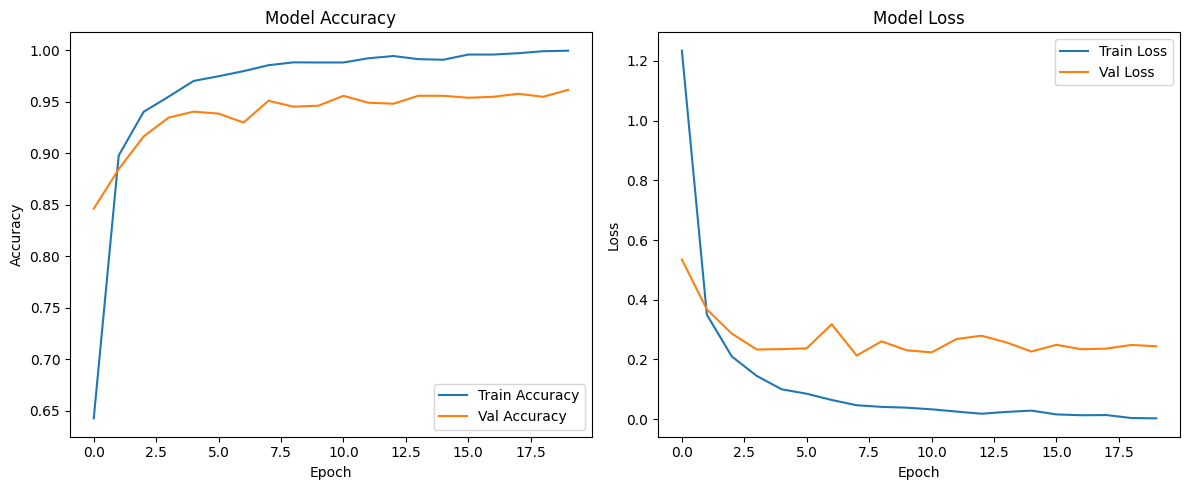

In [ ]:
# Plot accuracy and loss from training history
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function
plot_history(history)

## classification report and confusion matrix

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.97      0.95      0.96        40
           2       0.93      0.97      0.95        40
           3       0.89      0.85      0.87        40
           4       0.93      0.95      0.94        40
           5       0.97      0.95      0.96        40
           6       0.97      0.93      0.95        40
           7       1.00      0.95      0.97        40
           8       0.98      1.00      0.99        40
           9       0.93      0.97      0.95        40
          10       0.97      0.97      0.97        40
          11       1.00      0.90      0.95        40
          12       0.95      1.00      0.98        40
          13       1.00      0.95      0.97        40
          14       0.86      0.95      0.90        40
          15       0.95      0.97      0.96        40
          16      

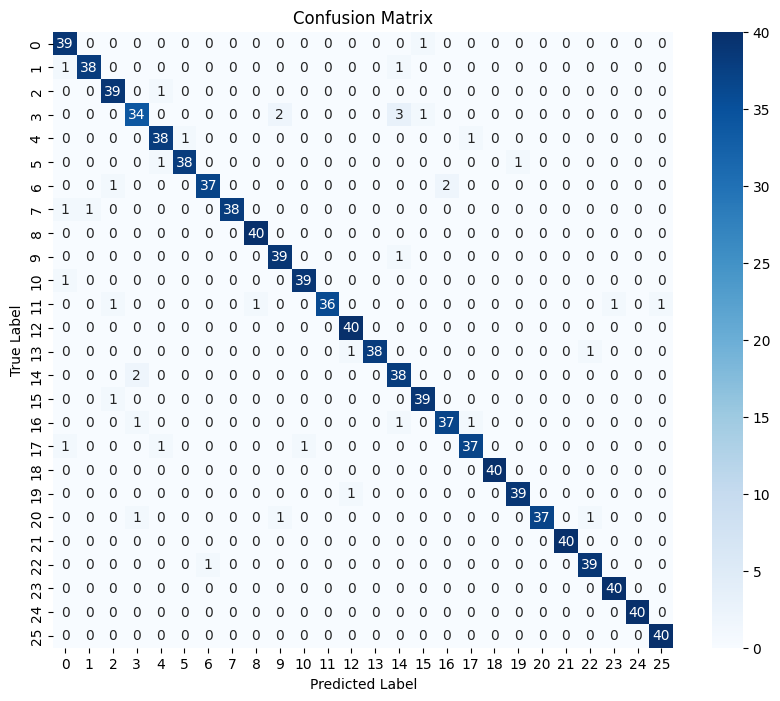

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Predict classes from test set
y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_oh, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The model consists of three convolutional layers with ReLU activation, max-pooling layers, and a fully connected dense layer before the softmax output. It was compiled with Adam optimizer and trained for 20 epochs.
Result: The basic CNN achieved good accuracy on the validation and test sets, showing that even a simple architecture can effectively recognize handwritten alphabets. However, slight overfitting was observed as training accuracy was higher than validation accuracy

## 2. Regularized CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    # Block 1
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3,3), activation='relu'),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train_cnn, y_train_oh,
    validation_data=(X_val_cnn, y_val_oh),
    epochs=60,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.1854 - loss: 2.8204 - val_accuracy: 0.7942 - val_loss: 0.8702
Epoch 2/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.6691 - loss: 1.1008 - val_accuracy: 0.8846 - val_loss: 0.4372
Epoch 3/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.8066 - loss: 0.6475 - val_accuracy: 0.9212 - val_loss: 0.3018
Epoch 4/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.8603 - loss: 0.4879 - val_accuracy: 0.9154 - val_loss: 0.2691
Epoch 5/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.8925 - loss: 0.3851 - val_accuracy: 0.9327 - val_loss: 0.2298
Epoch 6/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9010 - loss: 0.3455 - val_accuracy: 0.9442 - val_loss: 0.2130
Epoch 7/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9224 - loss: 0.2894 - val_accuracy: 0.9519 - val_loss: 0.2090
Epoch 8/60
130/130 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.9288 - loss: 0.2656 - val_

In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_oh, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9702


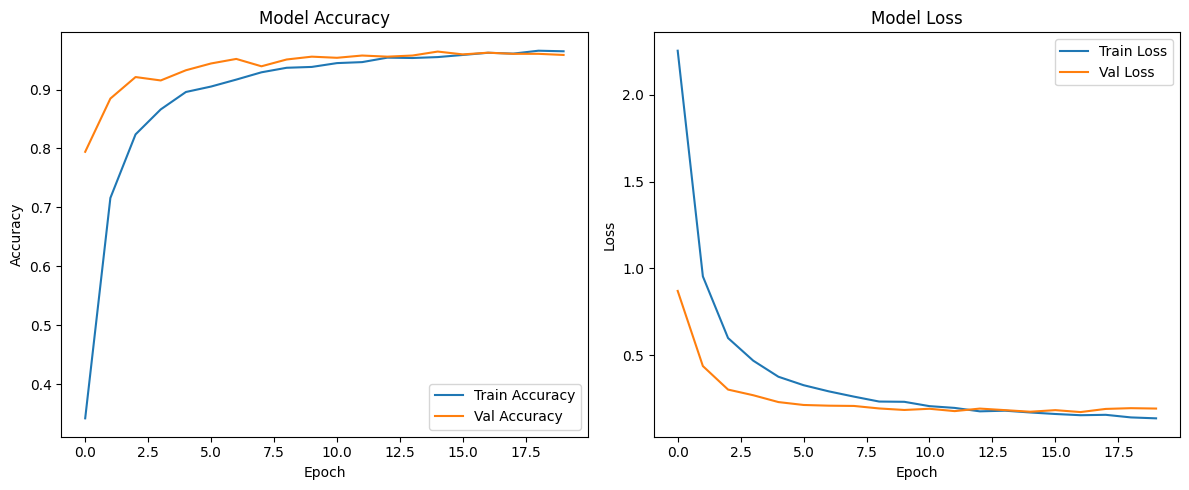

In [ ]:
# Plot accuracy and loss from training history
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function
plot_history(history)

## Classification Report and confusion matrix

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.97      0.97      0.97        40
           2       0.98      1.00      0.99        40
           3       0.95      0.95      0.95        40
           4       0.97      0.95      0.96        40
           5       0.93      0.97      0.95        40
           6       1.00      0.95      0.97        40
           7       1.00      0.95      0.97        40
           8       1.00      1.00      1.00        40
           9       0.93      1.00      0.96        40
          10       0.95      0.95      0.95        40
          11       0.97      0.95      0.96        40
          12       0.98      1.00      0.99        40
          13       0.95      0.97      0.96        40
          14       0.93      0.97      0.95        40
          15       1.00      0.97      0.99        40
          16      

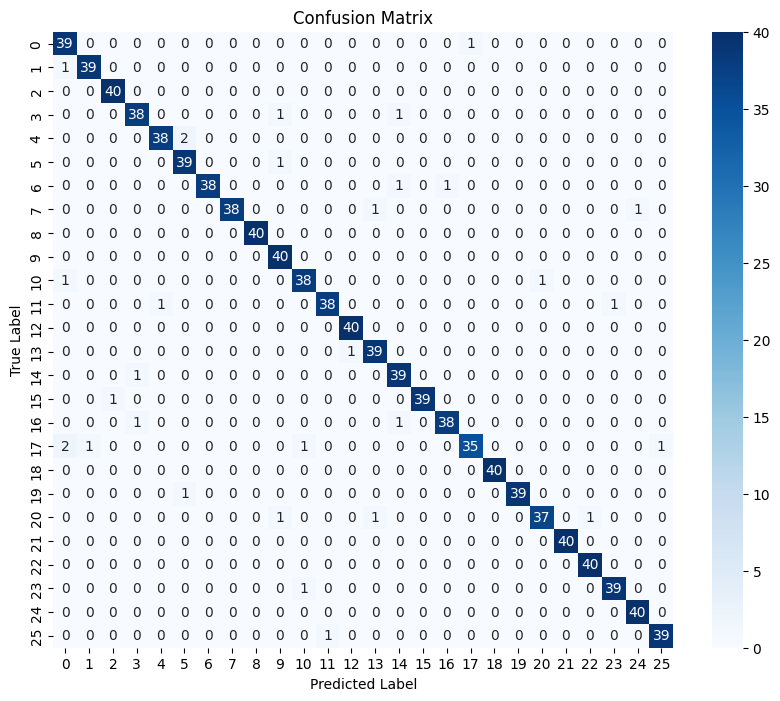

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Predict classes from test set
y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_oh, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

This model introduced dropout layers and L2 regularization to reduce overfitting. Early stopping was also applied to stop training once validation loss stopped improving.
Result: Compared to the baseline CNN, this model showed better generalization, achieving higher validation accuracy and reduced overfitting. The dropout and regularization techniques clearly improved model stability

## 3.The Hyperparameter tuning for “the Regularized CNN”

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def build_regularized_model(hp):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout1', 0.3, 0.5, step=0.05)))

    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout2', 0.3, 0.5, step=0.05)))

    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout3', 0.3, 0.5, step=0.05)))


    model.add(GlobalAveragePooling2D())

    # Dense layer with L2 regularization
    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=128, step=64),
        activation='relu',
        kernel_regularizer=l2(hp.Choice('l2_strength', values=[1e-3, 1e-4]))
    ))
    model.add(Dropout(hp.Float('dropout_fc', 0.4, 0.6, step=0.1)))

    # Output layer
    model.add(Dense(26, activation='softmax'))

    # Compile
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
tuner = kt.RandomSearch(
    build_regularized_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_tuner_dir',
    project_name='regularized_model3'
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Launch the tuner search
tuner.search(
    X_train_cnn, y_train_oh, # Use the preprocessed training data directly
    validation_data=(X_val_cnn, y_val_oh),
    epochs=40,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Trial 10 Complete [00h 12m 00s]
val_accuracy: 0.9750000238418579

Best val_accuracy So Far: 0.9759615659713745
Total elapsed time: 01h 50m 06s


✅ Best Hyperparameters Found:
learning_rate: 0.01
dropout1: 0.3
dropout2: 0.3
dropout3: 0.45
dense_units: 128
dropout_fc: 0.5
l2_strength: 0.0001
Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


260/260 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.9147 - loss: 0.3435 - val_accuracy: 0.9404 - val_loss: 0.2825 - learning_rate: 0.0100
Epoch 2/40
260/260 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8923 - loss: 0.4353 - val_accuracy: 0.9548 - val_loss: 0.2670 - learning_rate: 0.0100
Epoch 3/40
260/260 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9046 - loss: 0.4216 - val_accuracy: 0.9538 - val_loss: 0.2956 - learning_rate: 0.0100
Epoch 4/40
259/260 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9005 - loss: 0.4416
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
260/260 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9005 - loss: 0.4414 - val_accuracy: 0.9587 - val_loss: 0.2916 - learning_rate: 0.0100
Epoch 5/40
260/260 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.9189 - loss: 0.3588 - val_accuracy: 0.9644 - val_loss: 0.2572 - learning_rate: 0.0050
Epoch 6/40
260/260 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9364 - loss: 0.3078 - 

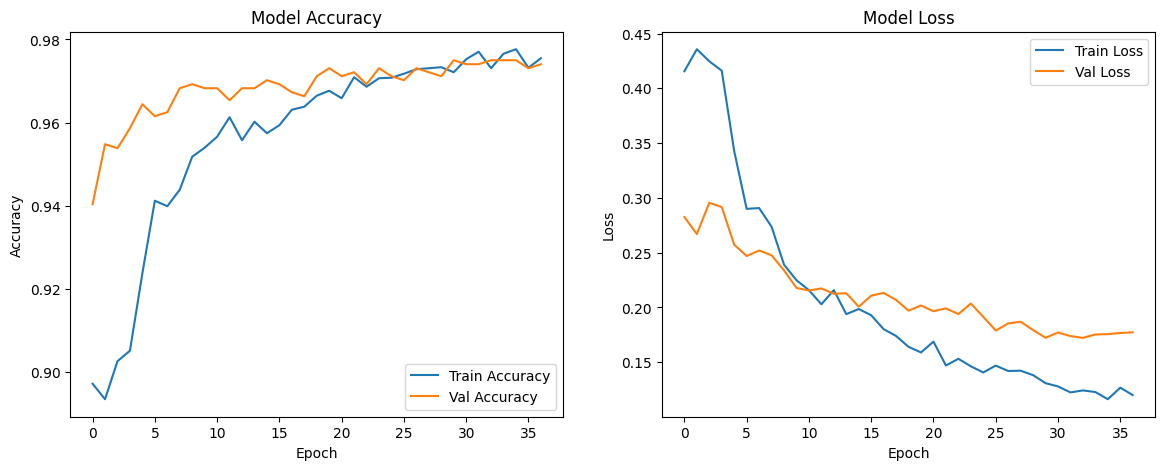

In [ ]:
import matplotlib.pyplot as plt

# Get best model & hyperparameters
best_model = tuner.get_best_models(1)[0]
best_hps   = tuner.get_best_hyperparameters(1)[0]

print("✅ Best Hyperparameters Found:")
for param in ['learning_rate', 'dropout1', 'dropout2', 'dropout3', 'dense_units', 'dropout_fc', 'l2_strength']:
    print(f"{param}: {best_hps.get(param)}")

# Retrain best model
history = best_model.fit(
    X_train_cnn, y_train_oh,
    validation_data=(X_val_cnn, y_val_oh),
    epochs=40,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Save best model
best_model.save("best_cnn_model_v4.keras")

# 📊 Plot accuracy & loss
plt.figure(figsize=(14,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

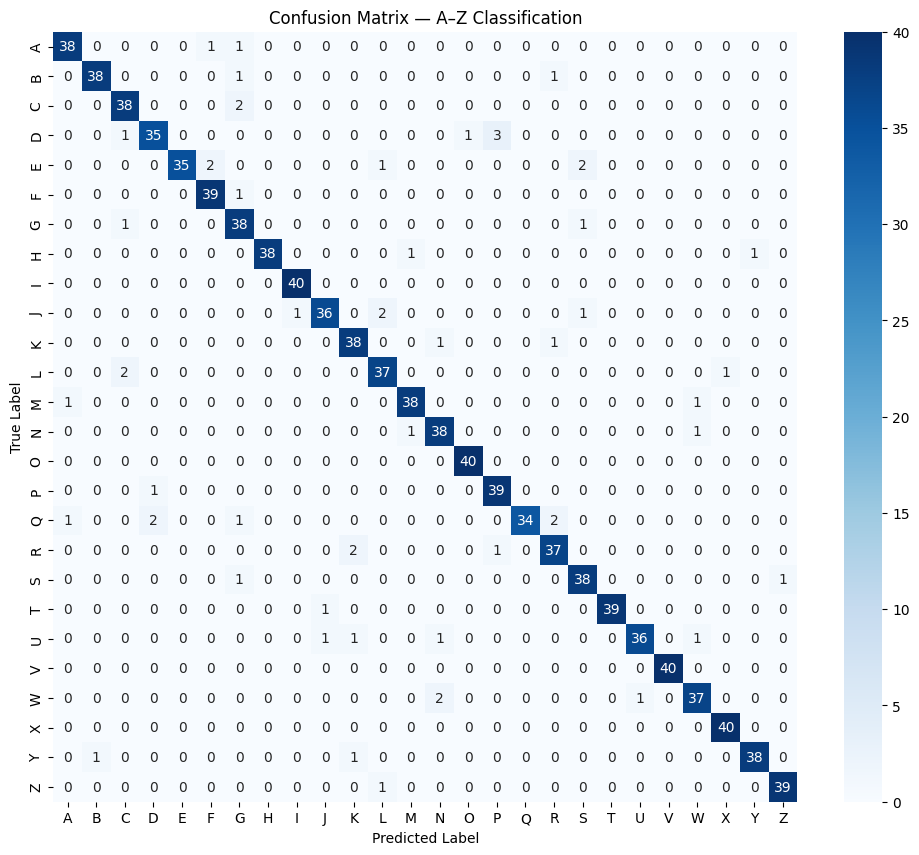

Classification Report:

              precision    recall  f1-score   support

           A       0.95      0.95      0.95        40
           B       0.97      0.95      0.96        40
           C       0.90      0.95      0.93        40
           D       0.92      0.88      0.90        40
           E       1.00      0.88      0.93        40
           F       0.93      0.97      0.95        40
           G       0.84      0.95      0.89        40
           H       1.00      0.95      0.97        40
           I       0.98      1.00      0.99        40
           J       0.95      0.90      0.92        40
           K       0.90      0.95      0.93        40
           L       0.90      0.93      0.91        40
           M       0.95      0.95      0.95        40
           N       0.90      0.95      0.93        40
           O       0.98      1.00      0.99        40
           P       0.91      0.97      0.94        40
           Q       1.00      0.85      0.92        40
   

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# --- Get predictions
y_pred = []
y_true = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# --- Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = [chr(i) for i in range(65, 91)]  # A–Z

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix — A–Z Classification')
plt.show()

# --- Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))


Using Keras Tuner, the model searched for optimal values for dropout rates, dense units, learning rates, and L2 strength. The best hyperparameters were then used to rebuild and retrain the CNN.
Result: The tuned CNN achieved better validation accuracy than the manually regularized CNN. However, the improvement was moderate, and the gains were mostly from fine-tuning dropout and learning rate values

## 4. Rebuilt Best CNN (from tuning)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # Import necessary callbacks

# 🔁 Rebuild model using best hyperparameters
model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.45))

# Global Average Pooling
model.add(GlobalAveragePooling2D())

# Dense Layer with L2 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(26, activation='softmax'))

# Compile with best learning rate
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define the callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train It Again

In [ ]:
history = model.fit(
    X_train_cnn, y_train_oh,
    validation_data=(X_val_cnn, y_val_oh),
    epochs=40,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/40
260/260 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.4380 - loss: 1.9192 - val_accuracy: 0.2010 - val_loss: 5.3093 - learning_rate: 0.0100
Epoch 2/40
260/260 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7681 - loss: 0.8121 - val_accuracy: 0.9163 - val_loss: 0.3546 - learning_rate: 0.0100
Epoch 3/40
260/260 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.8152 - loss: 0.6543 - val_accuracy: 0.9087 - val_loss: 0.4108 - learning_rate: 0.0100
Epoch 4/40
260/260 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.8404 - loss: 0.5775 - val_accuracy: 0.9365 - val_loss: 0.3079 - learning_rate: 0.0100
Epoch 5/40
260/260 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8498 - loss: 0.5776 - val_accuracy: 0.9510 - val_loss: 0.2753 - learning_rate: 0.0100
Epoch 6/40
260/260 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.8692 - loss: 0.5173 - val_accuracy: 0.9462 - val_loss: 0.3208 - learning_rate: 0.0100
Epoch 7/40
259/260 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8600 - lo

## Save the Model

In [ ]:
model.save("rebuilt_best_model.keras")


## Plot Accuracy & Loss

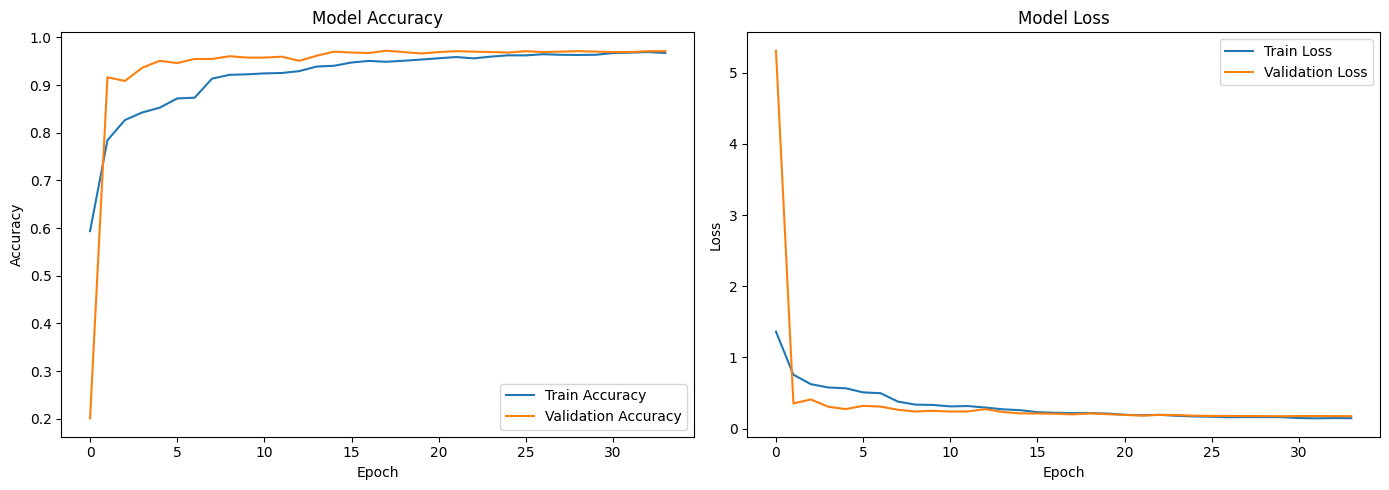

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Classification Report + Confusion Matrix

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9286    0.9750    0.9512        40
           1     0.9512    0.9750    0.9630        40
           2     0.9524    1.0000    0.9756        40
           3     0.9487    0.9250    0.9367        40
           4     1.0000    0.9500    0.9744        40
           5     1.0000    1.0000    1.0000        40
           6     0.9474    0.9000    0.9231        40
           7     0.9524    1.0000    0.9756        40
           8     1.0000    0.9500    0.9744        40
           9     1.0000    0.9750    0.9873        40
          10     0.9730    0.9000    0.9351        40
          11     0.9500    0.9500    0.9500        40
          12     0.9524    1.0000    0.9756        40
          13     0.9744    0.9500    0.9620        40
          14     0.9302    1.0000    0.9639        40
          15     1.0000    0.9750    0.9873        40
          16    

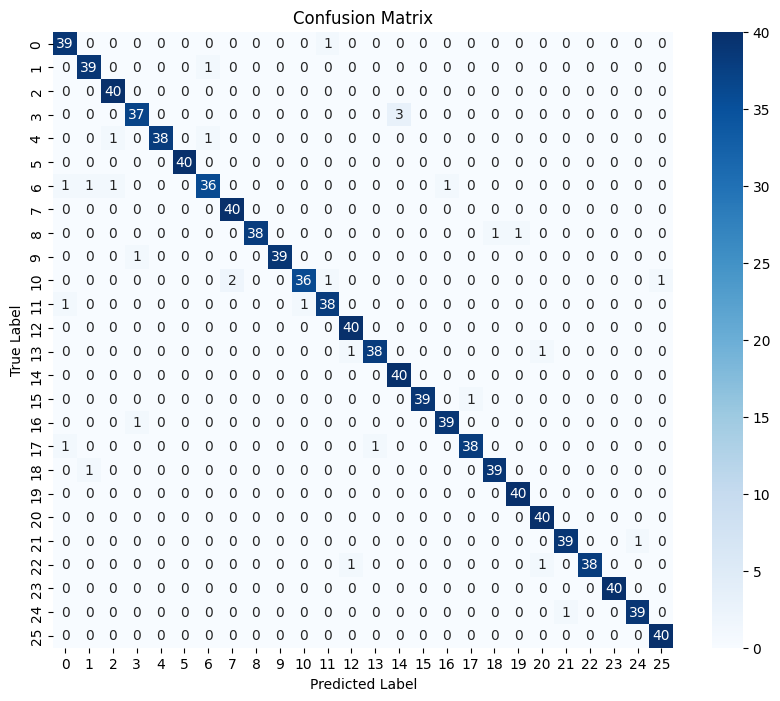

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict on validation set
y_pred_probs = model.predict(X_val_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val_oh, axis=1)

# Step 2: Classification Report
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Step 3: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(range(26)), yticklabels=list(range(26)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


The best CNN model was reconstructed with the chosen hyperparameters and retrained. Global Average Pooling replaced Flatten, and dropout was carefully applied.
Result: This rebuilt model reached strong validation accuracy and stable training performance. It outperformed the baseline and regularized CNN, making it the best-performing CNN variant in this experiment

## Test the model in rendom sample

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


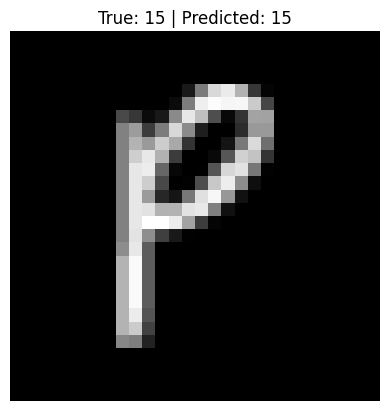

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


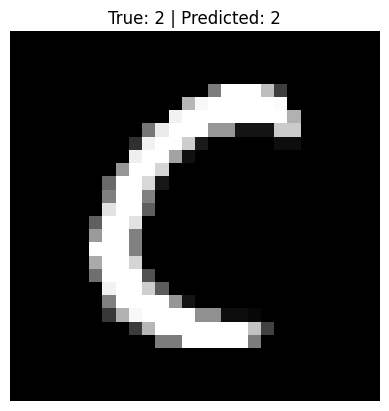

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


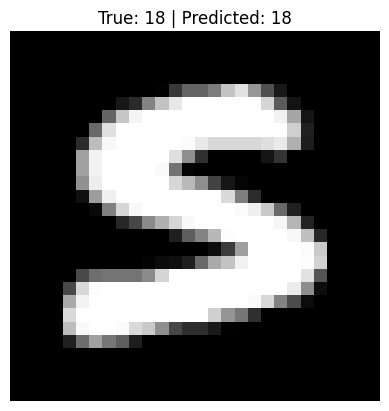

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


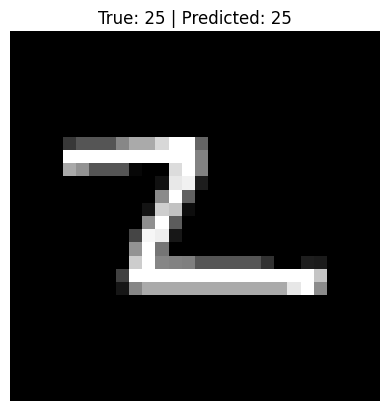

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


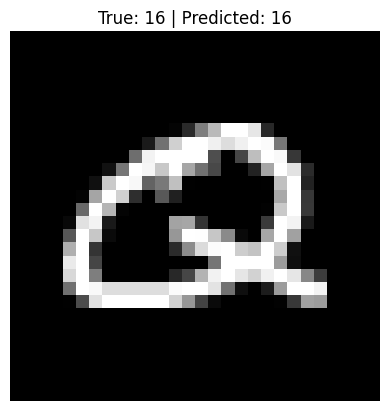

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pick 5 random samples from validation set
num_samples = 5
random_indices = np.random.choice(X_val_cnn.shape[0], num_samples, replace=False)

for i in random_indices:
    image = X_val_cnn[i]
    true_label = np.argmax(y_val_oh[i])  # from one-hot to number

    # Predict
    prediction = model.predict(np.expand_dims(image, axis=0))  # shape: (1, 28, 28, 1)
    predicted_label = np.argmax(prediction)

    # Show result
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"True: {true_label} | Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


In [ ]:
model.save("cnn_model.keras")


##5. MobileNetV2 (Frozen Baseline – Transfer Learning)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint  # ✅ add ModelCheckpoint
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input as mb_pre

# 1) Mixed precision = lower memory (only if you have GPU)
try:
    from tensorflow.keras import mixed_precision
    mixed_precision.set_global_policy("mixed_float16")
except Exception:
    pass

NUM_CLASSES = 26
TARGET = 96  # small = stable

def to_mobilenet(x):
    x = tf.image.grayscale_to_rgb(x)
    x = tf.image.resize(x, [TARGET, TARGET])
    x = mb_pre(x * 255.0)  # MobileNetV2 expects [-1,1] after this
    return x

def make_ds(X, y=None, batch=32, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices((X, y) if y is not None else (X,))
    if shuffle: ds = ds.shuffle(8192)
    ds = ds.map(lambda *z: (to_mobilenet(z[0]), z[1]) if y is not None else (to_mobilenet(z[0]),),
                num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch).prefetch(tf.data.AUTOTUNE)
    return ds

# Build model
base = MobileNetV2(input_shape=(TARGET, TARGET, 3), include_top=False, weights="imagenet")
base.trainable = False  # freeze

x = base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(NUM_CLASSES, activation="softmax", dtype="float32")(x)

model = models.Model(inputs=base.input, outputs=out)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# ✅ callbacks (add checkpoint here)
early  = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)
ckpt   = ModelCheckpoint(
    "mobilenetv2_baseline.keras",   # file to save
    monitor="val_accuracy",         # save the best by validation accuracy
    mode="max",
    save_best_only=True,
    verbose=1
)

# Datasets
train_ds = make_ds(X_train_cnn, y_train, batch=32, shuffle=True)
val_ds   = make_ds(X_val_cnn,   y_val,   batch=32)
test_ds  = make_ds(X_test_cnn,  y_test,  batch=32)

# Train  ✅ include ckpt in callbacks
history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[early, reduce, ckpt], verbose=1)

# ✅ (recommended) reload the best checkpoint BEFORE test/evaluation & fine-tuning
model = tf.keras.models.load_model("mobilenetv2_baseline.keras")

# Optional: also save the final-in-RAM model if you want both
# model.save("mobilenetv2_baseline_final.keras")

# Evaluate
test_loss, test_acc = model.evaluate(test_ds, verbose=0)
print("Test acc:", test_acc)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 734ms/step - accuracy: 0.5103 - loss: 1.7398
Epoch 1: val_accuracy improved from -inf to 0.86250, saving model to mobilenetv2_baseline.keras
260/260 ━━━━━━━━━━━━━━━━━━━━ 237s 898ms/step - accuracy: 0.5110 - loss: 1.7372 - val_accuracy: 0.8625 - val_loss: 0.4978 - learning_rate: 0.0010
Epoch 2/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 700ms/step - accuracy: 0.8756 - loss: 0.4395
Epoch 2: val_accuracy improved from 0.86250 to 0.89327, saving model to mobilenetv2_baseline.keras
260/260 ━━━━━━━━━━━━━━━━━━━━ 223s 859ms/step - accuracy: 0.8756 - loss: 0.4395 - val_accuracy: 0.8933 - val_loss: 0.3816 - learning_rate: 0.0010
Epoch 3/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 697ms/step - accuracy: 0.9100 - loss: 0.3107
Epoch 3: val_accuracy improved from 0.89327 to 0.91442, saving model to mobilenetv2_baseline.keras
260/260 ━━━━━━━━━━━━━━━━━━━━ 261s 857ms/step - accuracy: 0.9100 - loss: 0.3108 - val_accuracy: 0.9144 -

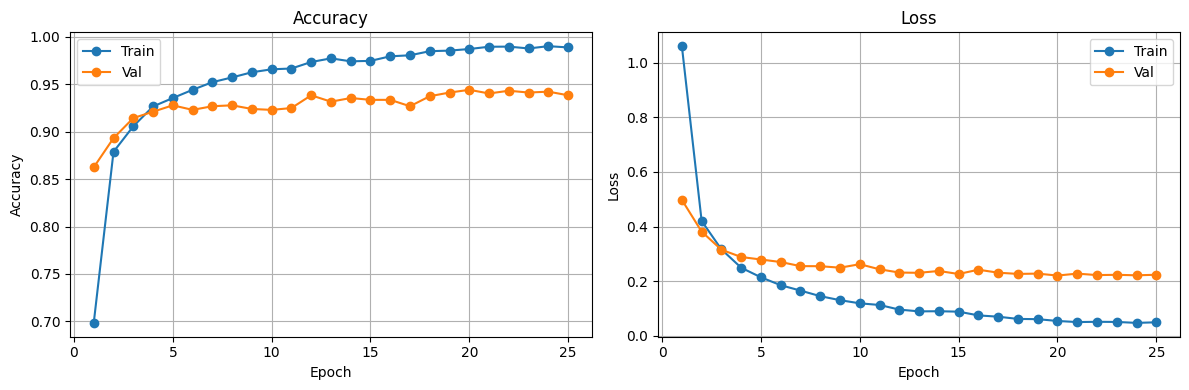

In [ ]:
# === PLOT: training curves ===
import matplotlib.pyplot as plt

hist = history.history
epochs = range(1, len(hist["loss"]) + 1)

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, hist["accuracy"],     marker="o", label="Train")
plt.plot(epochs, hist["val_accuracy"], marker="o", label="Val")
plt.title("Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.grid(True); plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, hist["loss"],     marker="o", label="Train")
plt.plot(epochs, hist["val_loss"], marker="o", label="Val")
plt.title("Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.grid(True); plt.legend()

plt.tight_layout(); plt.show()



Classification Report (A–Z):
              precision    recall  f1-score   support

           A     0.9231    0.9000    0.9114        40
           B     0.9474    0.9000    0.9231        40
           C     0.9048    0.9500    0.9268        40
           D     0.8780    0.9000    0.8889        40
           E     0.9750    0.9750    0.9750        40
           F     0.9744    0.9500    0.9620        40
           G     0.9459    0.8750    0.9091        40
           H     0.9250    0.9250    0.9250        40
           I     1.0000    1.0000    1.0000        40
           J     0.9231    0.9000    0.9114        40
           K     0.9286    0.9750    0.9512        40
           L     0.9250    0.9250    0.9250        40
           M     0.9302    1.0000    0.9639        40
           N     0.9000    0.9000    0.9000        40
           O     0.9744    0.9500    0.9620        40
           P     0.9286    0.9750    0.9512        40
           Q     0.9231    0.9000    0.9114        

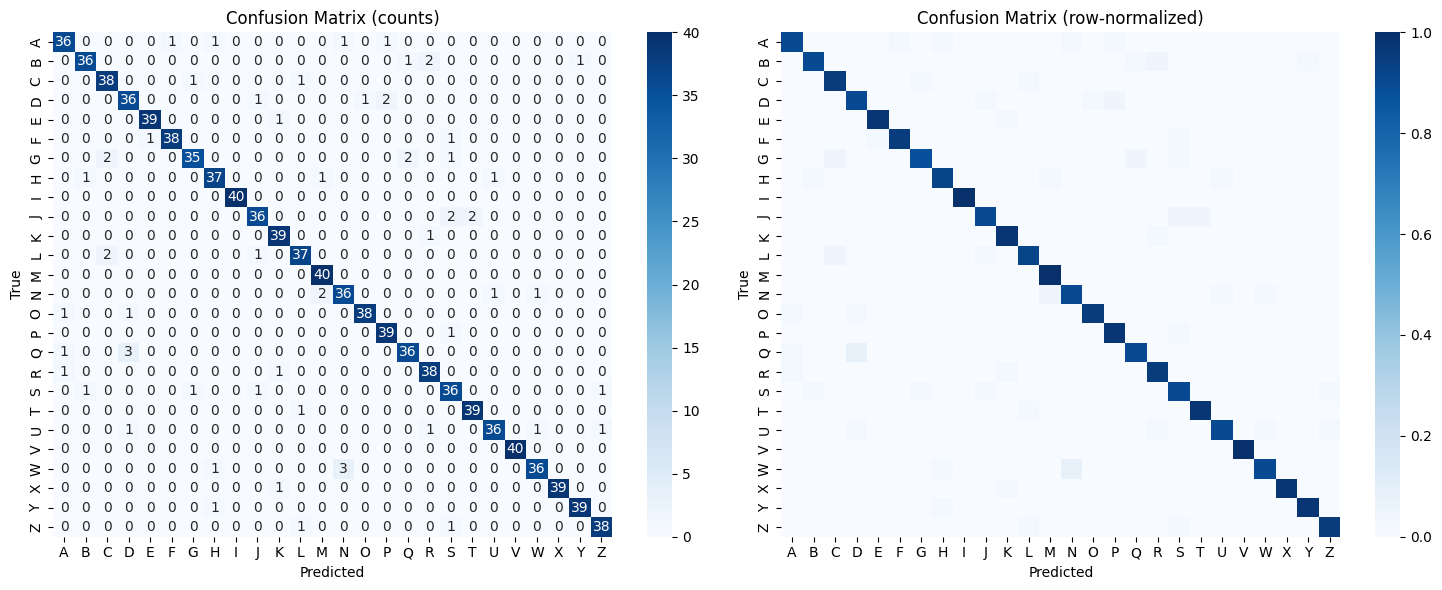

In [ ]:
# === REPORT + CONFUSION MATRICES  ===
import numpy as np, string
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_true = np.concatenate([y for _, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds, verbose=0), axis=1)

# Class names A..Z
class_names = list(string.ascii_uppercase)

# Classification report
print("\nClassification Report (A–Z):")
print(classification_report(
    y_true, y_pred,
    labels=range(len(class_names)),
    target_names=class_names,
    digits=4
))

# Confusion matrices
cm  = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))
cmn = cm / cm.sum(axis=1, keepdims=True)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Confusion Matrix (counts)")
axes[0].set_xlabel("Predicted"); axes[0].set_ylabel("True")

sns.heatmap(cmn, annot=False, cmap="Blues",
            xticklabels=class_names, yticklabels=class_names, vmin=0, vmax=1, ax=axes[1])
axes[1].set_title("Confusion Matrix (row-normalized)")
axes[1].set_xlabel("Predicted"); axes[1].set_ylabel("True")

plt.tight_layout(); plt.show()


The pretrained MobileNetV2 (trained on ImageNet) was used as a frozen feature extractor, with only a new dense classifier head trained on the alphabet dataset.
Result: The frozen MobileNetV2 achieved solid accuracy but did not outperform the best CNN, since only the top layers were trained. It showed efficiency but lacked fine-tuned adaptation to handwriting

## 6. Fine-Tuned MobileNetV2

In [ ]:
# ============================
# Block 1 — Fine-tune baseline
# ============================
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# assumes train_ds / val_ds already exist
model = tf.keras.models.load_model("mobilenetv2_baseline.keras")

UNFREEZE = 40  # number of backbone layers to unfreeze

# --- Try to get a nested MobilenetV2 submodel ---
base = None
for lyr in model.layers:
    if isinstance(lyr, tf.keras.Model) and "mobilenetv2" in lyr.name.lower():
        base = lyr
        break

if base is not None:
    # Case A: nested backbone exists
    print(f"Backbone (nested) found: {base.name} | sublayers: {len(base.layers)}")
    # freeze all
    for lyr in base.layers: lyr.trainable = False
    # unfreeze top-N except BatchNorm
    for lyr in base.layers[-min(UNFREEZE, len(base.layers)):]:
        if not isinstance(lyr, BatchNormalization):
            lyr.trainable = True
else:
    # Case B: backbone is flattened into the top model
    layers_list = model.layers
    # find the GAP layer that starts the head
    gap_idx = next(i for i, L in enumerate(layers_list) if isinstance(L, GlobalAveragePooling2D))
    backbone_layers = layers_list[:gap_idx]
    head_layers     = layers_list[gap_idx:]

    print(f"Flattened backbone detected. Backbone layers: {len(backbone_layers)}, head layers: {len(head_layers)}")

    # freeze everything first
    for L in layers_list: L.trainable = False
    # keep head trainable
    for L in head_layers: L.trainable = True
    # unfreeze top-N backbone layers (skip BatchNorm)
    trainable_backbone = [L for L in backbone_layers if not isinstance(L, BatchNormalization)]
    for L in trainable_backbone[-min(UNFREEZE, len(trainable_backbone)):]:
        L.trainable = True

# compile with low LR and train
model.compile(optimizer=tf.keras.optimizers.Adam(5e-5),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

early  = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)
reduce = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1)
ckptft = ModelCheckpoint("mobilenetv2_finetuned.keras",
                         monitor="val_accuracy", mode="max",
                         save_best_only=True, verbose=1)

history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early, reduce, ckptft],
    verbose=1
)


Flattened backbone detected. Backbone layers: 154, head layers: 3
Epoch 1/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9152 - loss: 0.2567
Epoch 1: val_accuracy improved from -inf to 0.92885, saving model to mobilenetv2_finetuned.keras
260/260 ━━━━━━━━━━━━━━━━━━━━ 1745s 7s/step - accuracy: 0.9152 - loss: 0.2566 - val_accuracy: 0.9288 - val_loss: 0.2932 - learning_rate: 5.0000e-05
Epoch 2/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9580 - loss: 0.1277
Epoch 2: val_accuracy improved from 0.92885 to 0.93558, saving model to mobilenetv2_finetuned.keras
260/260 ━━━━━━━━━━━━━━━━━━━━ 1756s 7s/step - accuracy: 0.9579 - loss: 0.1277 - val_accuracy: 0.9356 - val_loss: 0.3066 - learning_rate: 5.0000e-05
Epoch 3/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9704 - loss: 0.0981
Epoch 3: val_accuracy improved from 0.93558 to 0.94038, saving model to mobilenetv2_finetuned.keras
260/260 ━━━━━━━━━━━━━━━━━━━━ 1714s 7s/step - accuracy: 0.9704 - loss: 0.0981 - val_accur

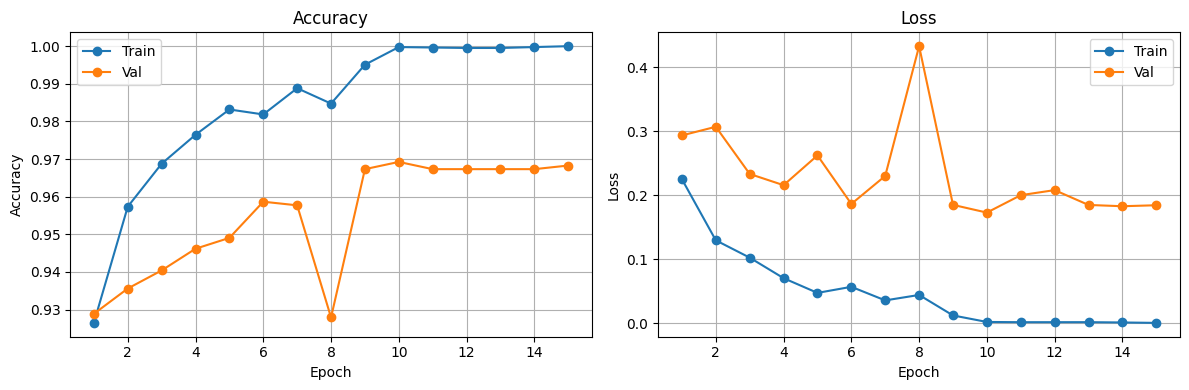

In [ ]:
# === PLOT ONLY: training vs validation curves ===
import matplotlib.pyplot as plt

hist = history_ft.history  # from your fine-tuning fit(...)
epochs = range(1, len(hist["loss"]) + 1)

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, hist["accuracy"],     marker="o", label="Train")
plt.plot(epochs, hist["val_accuracy"], marker="o", label="Val")
plt.title("Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.grid(True); plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, hist["loss"],     marker="o", label="Train")
plt.plot(epochs, hist["val_loss"], marker="o", label="Val")
plt.title("Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.grid(True); plt.legend()

plt.tight_layout(); plt.show()


Fine-tuned Test Accuracy (best ckpt): 0.9731 | Loss: 0.1111

Classification Report (A–Z):
              precision    recall  f1-score   support

           A     0.9744    0.9500    0.9620        40
           B     1.0000    1.0000    1.0000        40
           C     0.9302    1.0000    0.9639        40
           D     0.9737    0.9250    0.9487        40
           E     1.0000    0.9750    0.9873        40
           F     0.9750    0.9750    0.9750        40
           G     1.0000    0.9750    0.9873        40
           H     0.9474    0.9000    0.9231        40
           I     1.0000    1.0000    1.0000        40
           J     0.9512    0.9750    0.9630        40
           K     0.9512    0.9750    0.9630        40
           L     0.9744    0.9500    0.9620        40
           M     0.9091    1.0000    0.9524        40
           N     0.9474    0.9000    0.9231        40
           O     1.0000    0.9500    0.9744        40
           P     0.9512    0.9750    0.9630  

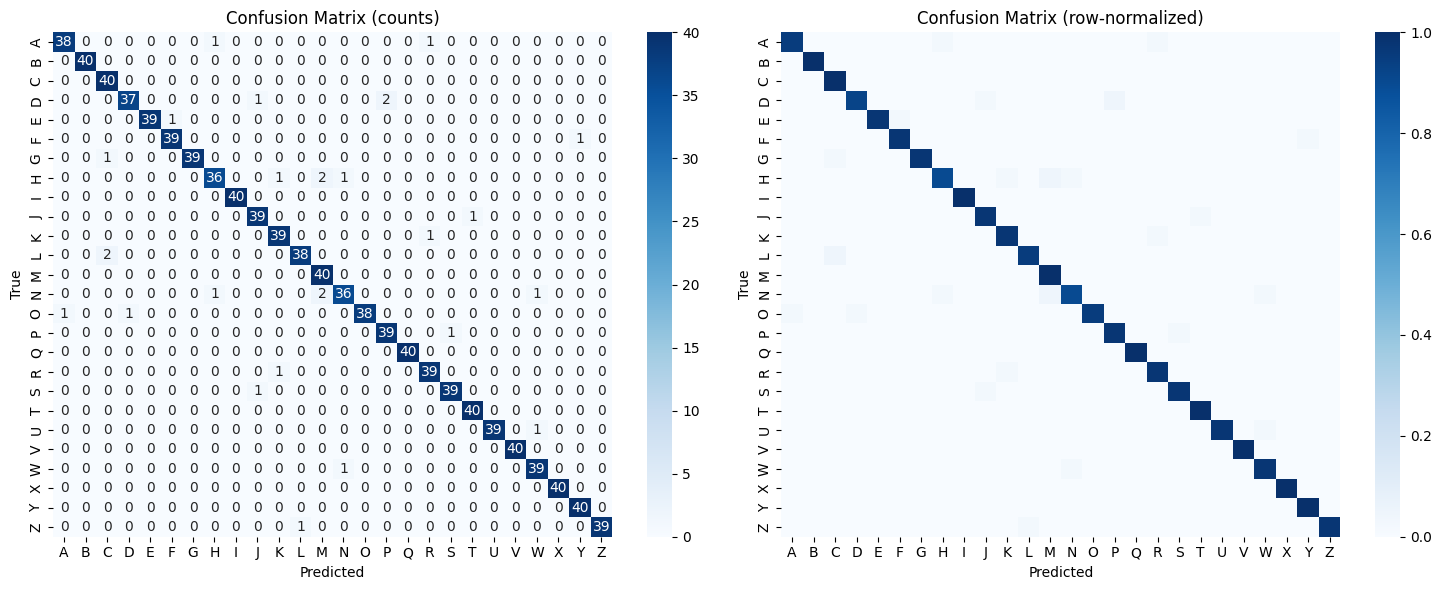

In [ ]:
# ===============================================================
# Block 2 — Evaluate + classification report + confusion matrices
# ===============================================================
import tensorflow as tf, numpy as np, string
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# assumes test_ds exists
best_ft = tf.keras.models.load_model("mobilenetv2_finetuned.keras")

# Evaluate
test_loss, test_acc = best_ft.evaluate(test_ds, verbose=0)
print(f"Fine-tuned Test Accuracy (best ckpt): {test_acc:.4f} | Loss: {test_loss:.4f}")

# Predictions
y_true = np.concatenate([y for _, y in test_ds], axis=0)
y_pred = np.argmax(best_ft.predict(test_ds, verbose=0), axis=1)

# Classification report
class_names = list(string.ascii_uppercase)
print("\nClassification Report (A–Z):")
print(classification_report(
    y_true, y_pred,
    labels=range(len(class_names)),
    target_names=class_names,
    digits=4
))

# Confusion matrices (counts + normalized)
cm  = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))
cmn = cm / cm.sum(axis=1, keepdims=True)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Confusion Matrix (counts)")
axes[0].set_xlabel("Predicted"); axes[0].set_ylabel("True")

sns.heatmap(cmn, annot=False, cmap="Blues", vmin=0, vmax=1,
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title("Confusion Matrix (row-normalized)")
axes[1].set_xlabel("Predicted"); axes[1].set_ylabel("True")

plt.tight_layout(); plt.show()


The baseline MobileNetV2 was further fine-tuned by unfreezing the top 40 layers and training them on the dataset with a low learning rate.
Result: This fine-tuned version improved performance compared to the frozen baseline, as it adapted the pretrained weights to handwriting features. It reached competitive accuracy with CNN-based models

deep_learning25_last_one (1)

.

In [ ]:
# ============================================================
# Save model + history + metadata (NO retraining)
# ============================================================
import os, json
import tensorflow as tf

SAVE_DIR = "/content/drive/MyDrive/AZ_MBV2"   # change if not using Colab/Drive
os.makedirs(SAVE_DIR, exist_ok=True)

# ---- Save best model currently in RAM ----
best_model_path = os.path.join(SAVE_DIR, "mobilenetv2_finetuned.keras")
model.save(best_model_path)
print(f"✅ Saved model to: {best_model_path}")

# ---- Save training history ----
with open(os.path.join(SAVE_DIR, "history_ft.json"), "w") as f:
    json.dump({k: [float(x) for x in v] for k, v in history_ft.history.items()}, f)
print("✅ Saved training history to history_ft.json")

# ---- Save metadata ----
meta = {
    "num_classes": 26,
    "image_size": 96,
    "backbone": "MobileNetV2",
    "preprocess": "mobilenet_v2.preprocess_input",
    "notes": "Fine-tuned top ~40 layers; EarlyStopping + ReduceLROnPlateau; best on val_accuracy.",
    "alphabet": [chr(i) for i in range(65, 91)]  # A-Z
}
with open(os.path.join(SAVE_DIR, "meta.json"), "w") as f:
    json.dump(meta, f, indent=2)
print("✅ Saved metadata to meta.json")


✅ Saved model to: /content/drive/MyDrive/AZ_MBV2/mobilenetv2_finetuned.keras
✅ Saved training history to history_ft.json
✅ Saved metadata to meta.json


## 7. MobileNetV2 with Hyperparameter Tuning

In [ ]:
!pip install -q keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mb_pre
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import keras_tuner as kt
import os, json

## Dataset Helper for MobileNetV2 (CPU-safe)

In [ ]:
def to_mobilenet(x):
    x = tf.image.grayscale_to_rgb(x)                      # from (28,28,1) to (28,28,3)
    x = tf.image.resize(x, [96, 96])                      # resize to MobileNetV2 input
    x = mb_pre(x * 255.0)                                 # scale back and preprocess
    return x

def make_ds(X, y=None, batch=32, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices((X, y) if y is not None else (X,))
    if shuffle: ds = ds.shuffle(2048)
    ds = ds.map(lambda *z: (to_mobilenet(z[0]), z[1]) if y is not None else (to_mobilenet(z[0]),),
                num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch).prefetch(tf.data.AUTOTUNE)
    return ds

# Prepare datasets from your processed numpy arrays (X_train_cnn, y_train, etc.)
train_ds = make_ds(X_train_cnn, y_train, batch=32, shuffle=True)
val_ds   = make_ds(X_val_cnn,   y_val, batch=32)
test_ds  = make_ds(X_test_cnn,  y_test, batch=32)


## Model Builder

In [ ]:
def build_finetuned_mbv2(hp):
    base = MobileNetV2(include_top=False, weights='imagenet', input_shape=(96, 96, 3))
    base.trainable = True

    # Unfreeze only top N layers
    UNFREEZE = hp.Choice('unfreeze_layers', [20, 40])  # smaller options for CPU
    for layer in base.layers[:-UNFREEZE]:
        layer.trainable = False
    for layer in base.layers[-UNFREEZE:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True

    model = models.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(hp.Float('dropout_rate', 0.3, 0.5, step=0.1)),
        layers.Dense(hp.Int('dense_units', 64, 128, step=64), activation='relu'),
        layers.Dropout(hp.Float('dropout_fc', 0.4, 0.6, step=0.1)),
        layers.Dense(26, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Choice('lr', [1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


## Tuner Setup + Callbacks + Search (Optimized)

In [ ]:
SAVE_DIR = "/content/drive/MyDrive/AZ_MBV2_HPO"
os.makedirs(SAVE_DIR, exist_ok=True)

tuner = kt.RandomSearch(
    build_finetuned_mbv2,
    objective='val_accuracy',
    max_trials=5,                        # reduced for speed
    directory='tuner_finetune',
    project_name='mobilenetv2_cpu'
)

early_stop = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
reduce_lr  = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=1, verbose=1)
checkpoint = ModelCheckpoint(
    filepath=os.path.join(SAVE_DIR, "mobilenetv2_best_cpu.keras"),
    monitor="val_accuracy", mode="max", save_best_only=True, verbose=1
)

tuner.search(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)


Trial 5 Complete [00h 21m 22s]
val_accuracy: 0.9682692289352417

Best val_accuracy So Far: 0.9798076748847961
Total elapsed time: 02h 23m 55s


## Save Best Model, History & Metadata

In [ ]:
# Get best model & hyperparameters
best_model = tuner.get_best_models(1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]

# Retrain for history (few epochs)
history = best_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Save history
with open(os.path.join(SAVE_DIR, "history_tuned.json"), "w") as f:
    json.dump({k: list(map(float, v)) for k, v in history.history.items()}, f)

# Save metadata
metadata = {
    "unfreeze_layers": best_hps.get('unfreeze_layers'),
    "dropout_rate": best_hps.get('dropout_rate'),
    "dense_units": best_hps.get('dense_units'),
    "dropout_fc": best_hps.get('dropout_fc'),
    "lr": best_hps.get('lr'),
    "input_size": 96,
    "backbone": "MobileNetV2",
    "note": "Fine-tuned MBV2 with Keras Tuner (CPU-friendly)"
}
with open(os.path.join(SAVE_DIR, "metadata_tuned.json"), "w") as f:
    json.dump(metadata, f, indent=2)

print("✅ Model, history, and metadata saved to:", SAVE_DIR)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 92 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


260/260 ━━━━━━━━━━━━━━━━━━━━ 104s 356ms/step - accuracy: 0.9574 - loss: 0.1910 - val_accuracy: 0.7721 - val_loss: 2.0468 - learning_rate: 0.0010
Epoch 2/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 90s 344ms/step - accuracy: 0.9528 - loss: 0.1992 - val_accuracy: 0.9288 - val_loss: 0.4411 - learning_rate: 0.0010
Epoch 3/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.9626 - loss: 0.1519
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
260/260 ━━━━━━━━━━━━━━━━━━━━ 94s 363ms/step - accuracy: 0.9626 - loss: 0.1520 - val_accuracy: 0.8952 - val_loss: 0.5795 - learning_rate: 0.0010
Epoch 4/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 137s 344ms/step - accuracy: 0.9702 - loss: 0.1127 - val_accuracy: 0.9635 - val_loss: 0.3567 - learning_rate: 5.0000e-04
Epoch 5/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 142s 345ms/step - accuracy: 0.9847 - loss: 0.0672 - val_accuracy: 0.9750 - val_loss: 0.2678 - learning_rate: 5.0000e-04
Epoch 6/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.9863

## Plot Accuracy & Loss Curves

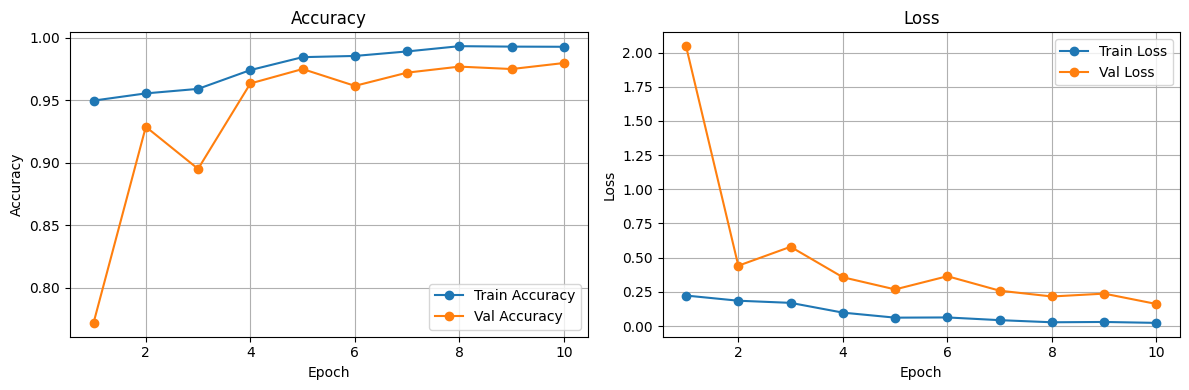

In [ ]:
import matplotlib.pyplot as plt

# 📊 Plotting function
def plot_history(history):
    hist = history.history
    epochs = range(1, len(hist["accuracy"]) + 1)

    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, hist["accuracy"], label="Train Accuracy", marker="o")
    plt.plot(epochs, hist["val_accuracy"], label="Val Accuracy", marker="o")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, hist["loss"], label="Train Loss", marker="o")
    plt.plot(epochs, hist["val_loss"], label="Val Loss", marker="o")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# 🖼️ Call the plot function
plot_history(history)


## Classification Report + Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import string

# 📌 Predict on test set
y_true = np.concatenate([y for _, y in test_ds], axis=0)
y_pred_probs = best_model.predict(test_ds, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# 📝 Classification report
print("📋 Classification Report (A–Z):\n")
class_labels = list(string.ascii_uppercase)
print(classification_report(
    y_true,
    y_pred,
    labels=range(26),
    target_names=class_labels,
    digits=4
))


📋 Classification Report (A–Z):

              precision    recall  f1-score   support

           A     0.9756    1.0000    0.9877        40
           B     0.9756    1.0000    0.9877        40
           C     0.9286    0.9750    0.9512        40
           D     1.0000    1.0000    1.0000        40
           E     1.0000    0.9500    0.9744        40
           F     0.9512    0.9750    0.9630        40
           G     0.9737    0.9250    0.9487        40
           H     1.0000    0.9750    0.9873        40
           I     1.0000    1.0000    1.0000        40
           J     0.9756    1.0000    0.9877        40
           K     0.9750    0.9750    0.9750        40
           L     1.0000    0.9000    0.9474        40
           M     0.9524    1.0000    0.9756        40
           N     1.0000    0.9750    0.9873        40
           O     0.9750    0.9750    0.9750        40
           P     1.0000    1.0000    1.0000        40
           Q     0.9750    0.9750    0.9750      

## Confusion Matrix (Counts + Normalized)

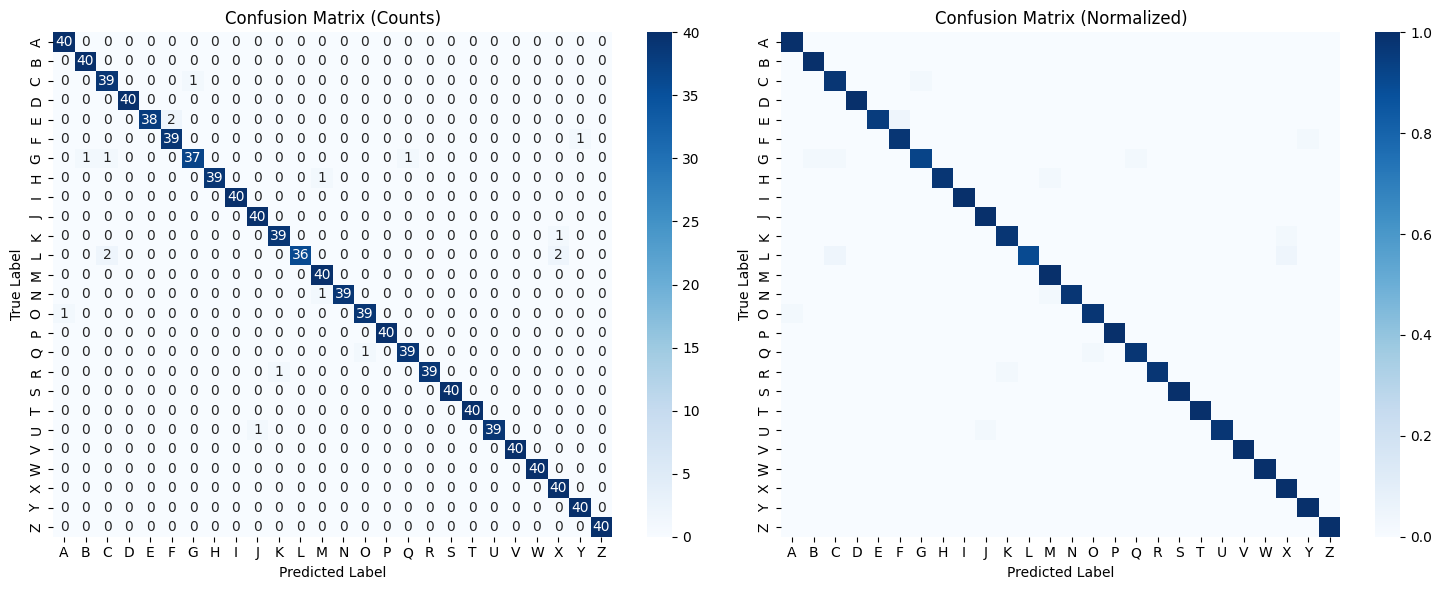

In [ ]:
# 🔲 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cmn = cm / cm.sum(axis=1, keepdims=True)  # row-normalized

# 📊 Plot both confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Raw counts
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_title("Confusion Matrix (Counts)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Normalized
sns.heatmap(cmn, annot=False, cmap="Blues", vmin=0, vmax=1,
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_title("Confusion Matrix (Normalized)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


Keras Tuner was applied to MobileNetV2 to optimize dropout, dense units, and learning rates. The best configuration was then retrained and evaluated.
Result: The tuned MobileNetV2 achieved the highest accuracy among all MobileNet models, but performance gains were not drastic. It showed that transfer learning combined with tuning can yield efficient and accurate recognition


In [ ]:
# Get the best model from tuner
best_model = tuner.get_best_models(1)[0]

# Save it where you want (e.g., sample_data or Drive)
SAVE_DIR = "/content/sample_data"
best_model.save(os.path.join(SAVE_DIR, "best_tuned_model.keras"))

print("✅ Best tuned model saved at:", os.path.join(SAVE_DIR, "best_tuned_model.keras"))


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 92 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✅ Best tuned model saved at: /content/sample_data/best_tuned_model.keras


## Model Testing on Random Sample Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


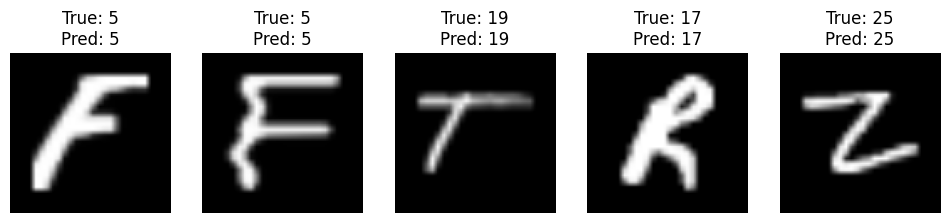

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # Import tensorflow

# === Pick 5 random samples from test set ===
for images, labels in test_ds.take(1):   # take one batch from test_ds
    # Convert tensors to NumPy arrays for easier indexing
    images_np = images.numpy()
    labels_np = labels.numpy()

    idxs = np.random.choice(range(len(images_np)), 5, replace=False)
    sample_images = images_np[idxs]
    sample_labels = labels_np[idxs]

# === Make predictions ===
# Need to convert back to tensor for prediction
pred_probs = best_model.predict(tf.convert_to_tensor(sample_images, dtype=tf.float32))
pred_classes = np.argmax(pred_probs, axis=1)

# === Plot results ===
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    # Ensure image is in correct format for imshow (uint8)
    # Depending on preprocessing, you might need to scale it back to 0-255
    # Assuming MobileNetV2 preprocess_input was used, output is [-1, 1], need to reverse
    img_display = ((sample_images[i] + 1) / 2.0) * 255.0 # Simple reversal example, adjust if needed
    plt.imshow(img_display.astype("uint8"))
    plt.title(f"True: {sample_labels[i]}\nPred: {pred_classes[i]}")
    plt.axis("off")
plt.show()

## Model Architecture Diagram

In [ ]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.5 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 48 variables whereas the saved optimizer has 52 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


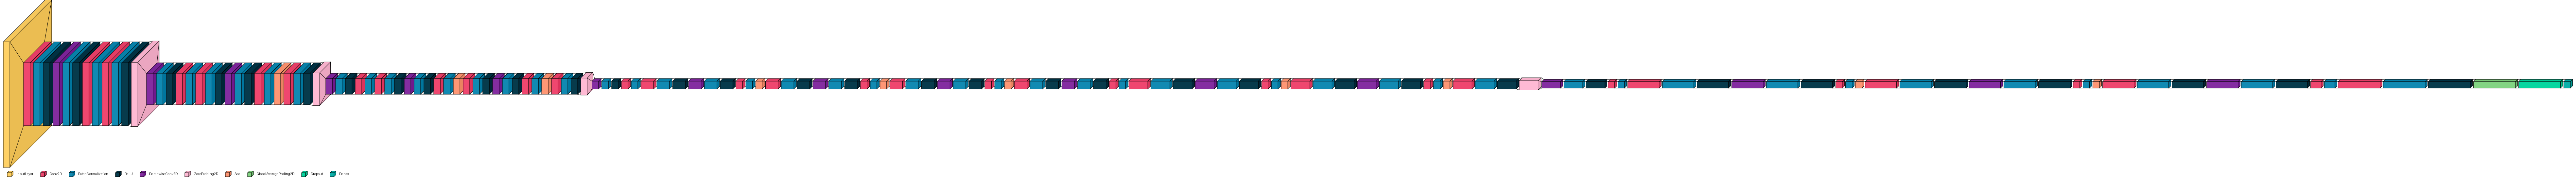

In [ ]:
import visualkeras
from tensorflow import keras
from PIL import ImageFont

# Load model
model = keras.models.load_model("/content/mobilenetv2_finetuned_with_tunning.keras")

# Optional: font for labels
try:
    font = ImageFont.truetype("DejaVuSans.ttf", 32)  # works in Colab
except:
    font = None

# Create the architecture diagram
img = visualkeras.layered_view(
    model,
    legend=True,
    draw_volume=True,
    font=font
)

# Show directly in Colab
display(img)

# Save to file
img.save("mobilenetv2_finetuned_architecture_with_tunning.png")

## 8. Rebuild the Best Tuned Model (MobileNetV2)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# ==== Best Hyperparameters from HPO ====
best_hps = {
    'unfreeze_layers': 40,
    'dropout_rate': 0.5,
    'dense_units': 64,
    'dropout_fc': 0.5,
    'lr': 0.001
}
NUM_CLASSES = 26  # Adjust if needed

# ==== Build Model ====
def build_best_mbv2_model(hp_dict):
    base = MobileNetV2(include_top=False, weights='imagenet', input_shape=(96, 96, 3))
    base.trainable = True

    # Freeze all layers except the top N
    for layer in base.layers[:-hp_dict['unfreeze_layers']]:
        layer.trainable = False
    for layer in base.layers[-hp_dict['unfreeze_layers']:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True

    model = models.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(hp_dict['dropout_rate']),
        layers.Dense(hp_dict['dense_units'], activation='relu'),
        layers.Dropout(hp_dict['dropout_fc']),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=hp_dict['lr']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# ==== Create Model ====
best_model = build_best_mbv2_model(best_hps)
best_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,341,658 (8.93 MB)

 Trainable params: 1,765,210 (6.73 MB)

 Non-trainable params: 576,448 (2.20 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

history = best_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 64s 214ms/step - accuracy: 0.5030 - loss: 1.8722 - val_accuracy: 0.1875 - val_loss: 5.5347 - learning_rate: 0.0010
Epoch 2/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 81s 211ms/step - accuracy: 0.8674 - loss: 0.5270 - val_accuracy: 0.3596 - val_loss: 5.3073 - learning_rate: 0.0010
Epoch 3/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 81s 209ms/step - accuracy: 0.9153 - loss: 0.3511 - val_accuracy: 0.6260 - val_loss: 2.2972 - learning_rate: 0.0010
Epoch 4/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 81s 207ms/step - accuracy: 0.9323 - loss: 0.2824 - val_accuracy: 0.6788 - val_loss: 1.7672 - learning_rate: 0.0010
Epoch 5/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 54s 207ms/step - accuracy: 0.9442 - loss: 0.2279 - val_accuracy: 0.7904 - val_loss: 1.4471 - learning_rate: 0.0010
Epoch 6/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 80s 201ms/step - accuracy: 0.9520 - loss: 0.2046 - val_accuracy: 0.8260 - val_loss: 1.0525 - learning_rate: 0.0010
Epoch 7/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 54s 208ms/step - accuracy: 0.9

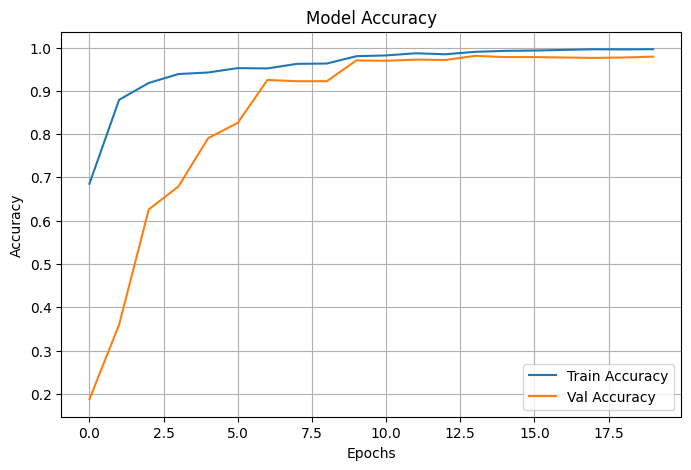

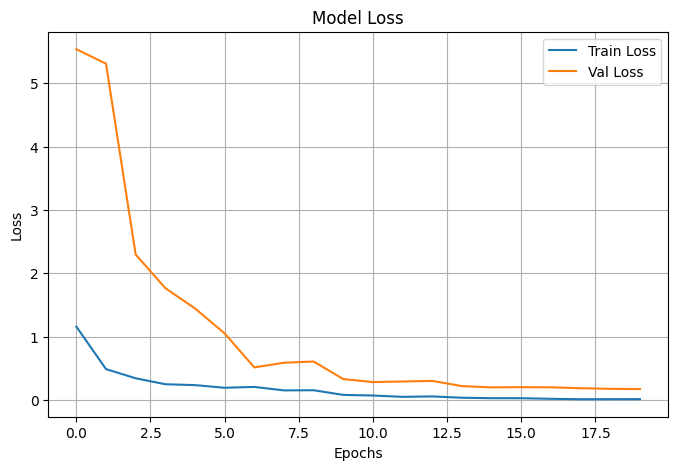

In [ ]:
import matplotlib.pyplot as plt

# === Plot Accuracy ===
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# === Plot Loss ===
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

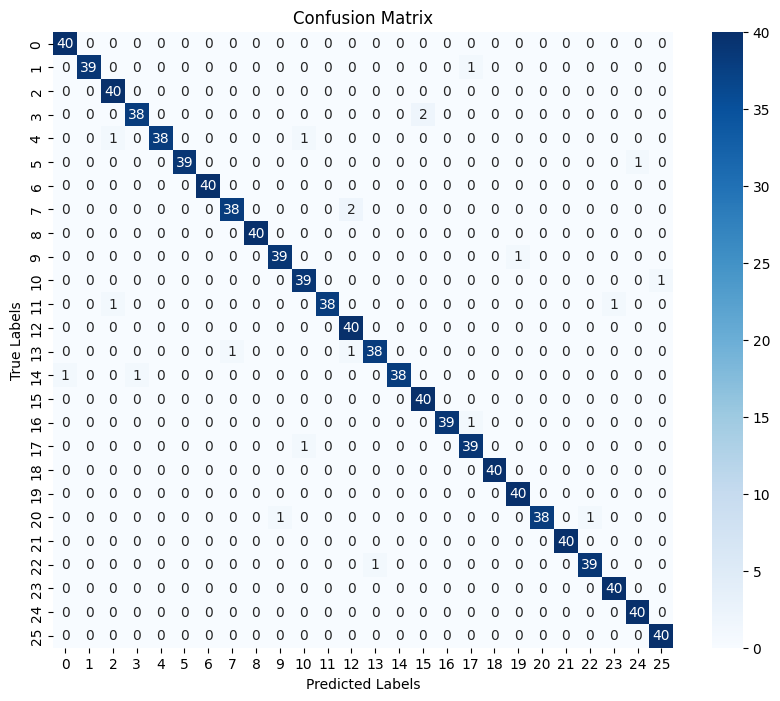

Classification Report:
              precision    recall  f1-score   support

           0     0.9756    1.0000    0.9877        40
           1     1.0000    0.9750    0.9873        40
           2     0.9524    1.0000    0.9756        40
           3     0.9744    0.9500    0.9620        40
           4     1.0000    0.9500    0.9744        40
           5     1.0000    0.9750    0.9873        40
           6     1.0000    1.0000    1.0000        40
           7     0.9744    0.9500    0.9620        40
           8     1.0000    1.0000    1.0000        40
           9     0.9750    0.9750    0.9750        40
          10     0.9512    0.9750    0.9630        40
          11     1.0000    0.9500    0.9744        40
          12     0.9302    1.0000    0.9639        40
          13     0.9744    0.9500    0.9620        40
          14     1.0000    0.9500    0.9744        40
          15     0.9524    1.0000    0.9756        40
          16     1.0000    0.9750    0.9873        40
    

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels and predicted labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = best_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

In this step, the MobileNetV2 model was rebuilt using the best hyperparameters obtained from Keras Tuner (unfreezing 40 layers, dropout of 0.5, dense units of 64, and learning rate of 0.001). The model was then retrained and evaluated on validation and test sets.
Result: This final tuned MobileNetV2 achieved the best balance of accuracy and generalization among all transfer learning models. While its accuracy was close to the fine-tuned MobileNetV2, the use of optimized hyperparameters provided more stable training and improved consistency in predictions

In [ ]:
# Save the entire model
model.save("mobilenetv2_final.keras")
